# Lecture 3 notebook - IRIS dataset
## Introduction to TensorFlow and Deep Learning

## IADS Summer School 2023

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 3 of the course

### Load the Iris Dataset


In [2]:
import pandas as pd

#Load CSV files
#inputs_train=pd.read_csv('datasets/iris_train.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
#labels_train = pd.read_csv('datasets/iris_train.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
#inputs_test=pd.read_csv('datasets/iris_test.csv',usecols = [0,1,2,3],skiprows = None,header=None).values
#labels_test = pd.read_csv('datasets/iris_test.csv',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
# If the above line fails then try instead the following 4 lines, to download it directly from 
# my google drive account
inputs_train=pd.read_csv('https://drive.google.com/uc?export=download&id=15g37AN8yaPJtuQwOnhuNuMIWcMr8vB9C',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_train = pd.read_csv('https://drive.google.com/uc?export=download&id=15g37AN8yaPJtuQwOnhuNuMIWcMr8vB9C',usecols = [4],skiprows = None ,header=None).values.reshape(-1)
inputs_test=pd.read_csv('https://drive.google.com/uc?export=download&id=1a7ok2PiILjhzrB3cUWmXvBmHY-cpZ6lc',usecols = [0,1,2,3],skiprows = None,header=None).values
labels_test = pd.read_csv('https://drive.google.com/uc?export=download&id=1a7ok2PiILjhzrB3cUWmXvBmHY-cpZ6lc',usecols = [4],skiprows = None ,header=None).values.reshape(-1)


print("Data loaded")
print("Train set inputs:",inputs_train)
print("Train set labels:",labels_train)
print("Test set inputs:",inputs_test)
print("Test set labels:",labels_test)


Data loaded
Train set inputs: [[6.4 2.8 5.6 2.2]
 [5.  2.3 3.3 1. ]
 [4.9 2.5 4.5 1.7]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]
 [6.9 3.1 5.1 2.3]
 [6.7 3.1 4.4 1.4]
 [5.1 3.7 1.5 0.4]
 [5.2 2.7 3.9 1.4]
 [6.9 3.1 4.9 1.5]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [7.7 3.8 6.7 2.2]
 [6.3 3.3 4.7 1.6]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [6.4 3.2 5.3 2.3]
 [5.7 4.4 1.5 0.4]
 [6.7 3.3 5.7 2.1]
 [6.4 2.8 5.6 2.1]
 [5.4 3.9 1.3 0.4]
 [6.1 2.6 5.6 1.4]
 [7.2 3.  5.8 1.6]
 [5.2 3.5 1.5 0.2]
 [5.8 2.6 4.  1.2]
 [5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.3 2.3 4.4 1.3]
 [5.1 2.5 3.  1.1]
 [6.4 3.2 4.5 1.5]
 [6.8 3.  5.5 2.1]
 [6.2 2.8 4.8 1.8]
 [6.9 3.2 5.7 2.3]
 [6.5 3.2 5.1 2. ]
 [5.8 2.8 5.1 2.4]
 [5.1 3.8 1.5 0.3]
 [4.8 3.  1.4 0.3]
 [7.9 3.8 6.4 2. ]
 [5.8 2.7 5.1 1.9]
 [6.7 3.  5.2 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.  2.2 5.  1.5]
 [4.8 3.4 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [4.6 3.6 1.  0.2]
 [7.2 3.2 6.  1.8]
 [5.  3.3 1.4 0.2]
 

#### Build the neural network

In [15]:
import tensorflow as tf
from tensorflow import keras

#Neural network
hids=[4,20,20,3]
k_l2=0.00
layer1=tf.keras.layers.Dense(hids[1], activation='tanh')
layer1do=tf.keras.layers.Dropout(rate=0.5)
layer2=tf.keras.layers.Dense(hids[2], activation='tanh')
layer2do=tf.keras.layers.Dropout(rate=0.5)
layer3=tf.keras.layers.Dense(hids[3], activation='softmax')
keras_model = tf.keras.Sequential([layer1,layer1do,layer2,layer2do,layer3])
print(keras_model(inputs_train[0:1,:])) # we have to run the network once before the trainable_variables are created
print(keras_model.summary()) # Prints an overview of a keras model

tf.Tensor([[0.38040227 0.32902068 0.29057708]], shape=(1, 3), dtype=float32)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (1, 20)                   100       
                                                                 
 dropout (Dropout)           (1, 20)                   0         
                                                                 
 dense_7 (Dense)             (1, 20)                   420       
                                                                 
 dropout_1 (Dropout)         (1, 20)                   0         
                                                                 
 dense_8 (Dense)             (1, 3)                    63        
                                                                 
Total params: 583 (2.28 KB)
Trainable params: 583 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

#### Train the neural network

In [17]:
optimizer = tf.keras.optimizers.Adam()
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy(),tf.keras.losses.SparseCategoricalCrossentropy()]
) 


In [18]:
# Train loop
history = keras_model.fit(
    inputs_train,
    labels_train,
    batch_size=len(inputs_train),
    epochs=2000,
    validation_data=(inputs_test, labels_test),
)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 1.3770 - sparse_categorical_accuracy: 0.3917 - sparse_categorical_crossentropy: 1.3770 - val_loss: 1.0091 - val_sparse_categorical_accuracy: 0.2667 - val_sparse_categorical_crossentropy: 1.0091
Epoch 2/2000
1/1 [==============================] - 0s 57ms/step - loss: 1.1286 - sparse_categorical_accuracy: 0.5250 - sparse_categorical_crossentropy: 1.1286 - val_loss: 0.9983 - val_sparse_categorical_accuracy: 0.2667 - val_sparse_categorical_crossentropy: 0.9983
Epoch 3/2000
1/1 [==============================] - 0s 60ms/step - loss: 1.5342 - sparse_categorical_accuracy: 0.3083 - sparse_categorical_crossentropy: 1.5342 - val_loss: 0.9878 - val_sparse_categorical_accuracy: 0.3000 - val_sparse_categorical_crossentropy: 0.9878
Epoch 4/2000
1/1 [==============================] - 0s 47ms/step - loss: 1.2725 - sparse_categorical_accuracy: 0.4083 - sparse_categorical_crossentropy: 1.2725 - val_loss: 0.9754 - val_sparse_categoric

Epoch 32/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.9476 - sparse_categorical_accuracy: 0.5500 - sparse_categorical_crossentropy: 0.9476 - val_loss: 0.8015 - val_sparse_categorical_accuracy: 0.5333 - val_sparse_categorical_crossentropy: 0.8015
Epoch 33/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.0059 - sparse_categorical_accuracy: 0.5250 - sparse_categorical_crossentropy: 1.0059 - val_loss: 0.7981 - val_sparse_categorical_accuracy: 0.5333 - val_sparse_categorical_crossentropy: 0.7981
Epoch 34/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.9953 - sparse_categorical_accuracy: 0.5167 - sparse_categorical_crossentropy: 0.9953 - val_loss: 0.7945 - val_sparse_categorical_accuracy: 0.5333 - val_sparse_categorical_crossentropy: 0.7945
Epoch 35/2000
1/1 [==============================] - 0s 36ms/step - loss: 1.1372 - sparse_categorical_accuracy: 0.4167 - sparse_categorical_crossentropy: 1.1372 - val_loss: 0.7909 - val_sparse_cat

1/1 [==============================] - 0s 36ms/step - loss: 0.9347 - sparse_categorical_accuracy: 0.5333 - sparse_categorical_crossentropy: 0.9347 - val_loss: 0.6861 - val_sparse_categorical_accuracy: 0.5667 - val_sparse_categorical_crossentropy: 0.6861
Epoch 63/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.9166 - sparse_categorical_accuracy: 0.5333 - sparse_categorical_crossentropy: 0.9166 - val_loss: 0.6828 - val_sparse_categorical_accuracy: 0.5667 - val_sparse_categorical_crossentropy: 0.6828
Epoch 64/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.9229 - sparse_categorical_accuracy: 0.5667 - sparse_categorical_crossentropy: 0.9229 - val_loss: 0.6791 - val_sparse_categorical_accuracy: 0.6000 - val_sparse_categorical_crossentropy: 0.6791
Epoch 65/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.8438 - sparse_categorical_accuracy: 0.6333 - sparse_categorical_crossentropy: 0.8438 - val_loss: 0.6756 - val_sparse_categorical_accur

Epoch 93/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.7139 - sparse_categorical_accuracy: 0.6750 - sparse_categorical_crossentropy: 0.7139 - val_loss: 0.6028 - val_sparse_categorical_accuracy: 0.6000 - val_sparse_categorical_crossentropy: 0.6028
Epoch 94/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.7373 - sparse_categorical_accuracy: 0.6583 - sparse_categorical_crossentropy: 0.7373 - val_loss: 0.6014 - val_sparse_categorical_accuracy: 0.6000 - val_sparse_categorical_crossentropy: 0.6014
Epoch 95/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.7007 - sparse_categorical_accuracy: 0.6667 - sparse_categorical_crossentropy: 0.7007 - val_loss: 0.5997 - val_sparse_categorical_accuracy: 0.6000 - val_sparse_categorical_crossentropy: 0.5997
Epoch 96/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.7095 - sparse_categorical_accuracy: 0.6917 - sparse_categorical_crossentropy: 0.7095 - val_loss: 0.5978 - val_sparse_cat

1/1 [==============================] - 0s 38ms/step - loss: 0.6003 - sparse_categorical_accuracy: 0.7333 - sparse_categorical_crossentropy: 0.6003 - val_loss: 0.5326 - val_sparse_categorical_accuracy: 0.7000 - val_sparse_categorical_crossentropy: 0.5326
Epoch 124/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.6570 - sparse_categorical_accuracy: 0.7167 - sparse_categorical_crossentropy: 0.6570 - val_loss: 0.5307 - val_sparse_categorical_accuracy: 0.7000 - val_sparse_categorical_crossentropy: 0.5307
Epoch 125/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6655 - sparse_categorical_accuracy: 0.6833 - sparse_categorical_crossentropy: 0.6655 - val_loss: 0.5292 - val_sparse_categorical_accuracy: 0.7000 - val_sparse_categorical_crossentropy: 0.5292
Epoch 126/2000
1/1 [==============================] - 0s 162ms/step - loss: 0.6916 - sparse_categorical_accuracy: 0.6500 - sparse_categorical_crossentropy: 0.6916 - val_loss: 0.5280 - val_sparse_categorical_a

1/1 [==============================] - 0s 38ms/step - loss: 0.5719 - sparse_categorical_accuracy: 0.7000 - sparse_categorical_crossentropy: 0.5719 - val_loss: 0.4898 - val_sparse_categorical_accuracy: 0.7000 - val_sparse_categorical_crossentropy: 0.4898
Epoch 154/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.6120 - sparse_categorical_accuracy: 0.6833 - sparse_categorical_crossentropy: 0.6120 - val_loss: 0.4889 - val_sparse_categorical_accuracy: 0.7000 - val_sparse_categorical_crossentropy: 0.4889
Epoch 155/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.5373 - sparse_categorical_accuracy: 0.7417 - sparse_categorical_crossentropy: 0.5373 - val_loss: 0.4878 - val_sparse_categorical_accuracy: 0.7000 - val_sparse_categorical_crossentropy: 0.4878
Epoch 156/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.5867 - sparse_categorical_accuracy: 0.7000 - sparse_categorical_crossentropy: 0.5867 - val_loss: 0.4868 - val_sparse_categorical_ac

1/1 [==============================] - 0s 41ms/step - loss: 0.5088 - sparse_categorical_accuracy: 0.7333 - sparse_categorical_crossentropy: 0.5088 - val_loss: 0.4335 - val_sparse_categorical_accuracy: 0.9000 - val_sparse_categorical_crossentropy: 0.4335
Epoch 184/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.5033 - sparse_categorical_accuracy: 0.7667 - sparse_categorical_crossentropy: 0.5033 - val_loss: 0.4324 - val_sparse_categorical_accuracy: 0.9000 - val_sparse_categorical_crossentropy: 0.4324
Epoch 185/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.5168 - sparse_categorical_accuracy: 0.7583 - sparse_categorical_crossentropy: 0.5168 - val_loss: 0.4317 - val_sparse_categorical_accuracy: 0.9000 - val_sparse_categorical_crossentropy: 0.4317
Epoch 186/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.4934 - sparse_categorical_accuracy: 0.7750 - sparse_categorical_crossentropy: 0.4934 - val_loss: 0.4315 - val_sparse_categorical_ac

1/1 [==============================] - 0s 57ms/step - loss: 0.3995 - sparse_categorical_accuracy: 0.8500 - sparse_categorical_crossentropy: 0.3995 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3964
Epoch 214/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.4230 - sparse_categorical_accuracy: 0.8000 - sparse_categorical_crossentropy: 0.4230 - val_loss: 0.3940 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3940
Epoch 215/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.4032 - sparse_categorical_accuracy: 0.8250 - sparse_categorical_crossentropy: 0.4032 - val_loss: 0.3913 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3913
Epoch 216/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.4582 - sparse_categorical_accuracy: 0.7833 - sparse_categorical_crossentropy: 0.4582 - val_loss: 0.3893 - val_sparse_categorical_ac

1/1 [==============================] - 0s 58ms/step - loss: 0.4531 - sparse_categorical_accuracy: 0.7917 - sparse_categorical_crossentropy: 0.4531 - val_loss: 0.3451 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3451
Epoch 244/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.4233 - sparse_categorical_accuracy: 0.8083 - sparse_categorical_crossentropy: 0.4233 - val_loss: 0.3437 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3437
Epoch 245/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.4166 - sparse_categorical_accuracy: 0.8250 - sparse_categorical_crossentropy: 0.4166 - val_loss: 0.3434 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3434
Epoch 246/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.3994 - sparse_categorical_accuracy: 0.8500 - sparse_categorical_crossentropy: 0.3994 - val_loss: 0.3441 - val_sparse_categorical_ac

1/1 [==============================] - 0s 36ms/step - loss: 0.3688 - sparse_categorical_accuracy: 0.8500 - sparse_categorical_crossentropy: 0.3688 - val_loss: 0.3183 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3183
Epoch 274/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.3507 - sparse_categorical_accuracy: 0.8667 - sparse_categorical_crossentropy: 0.3507 - val_loss: 0.3136 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3136
Epoch 275/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.3329 - sparse_categorical_accuracy: 0.9000 - sparse_categorical_crossentropy: 0.3329 - val_loss: 0.3078 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.3078
Epoch 276/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.3796 - sparse_categorical_accuracy: 0.8417 - sparse_categorical_crossentropy: 0.3796 - val_loss: 0.3028 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.2973 - sparse_categorical_accuracy: 0.8917 - sparse_categorical_crossentropy: 0.2973 - val_loss: 0.2677 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.2677
Epoch 304/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.3144 - sparse_categorical_accuracy: 0.9167 - sparse_categorical_crossentropy: 0.3144 - val_loss: 0.2675 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.2675
Epoch 305/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.3269 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.3269 - val_loss: 0.2677 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.2677
Epoch 306/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2866 - sparse_categorical_accuracy: 0.9167 - sparse_categorical_crossentropy: 0.2866 - val_loss: 0.2676 - val_sparse_categorical_ac

1/1 [==============================] - 0s 40ms/step - loss: 0.2643 - sparse_categorical_accuracy: 0.9083 - sparse_categorical_crossentropy: 0.2643 - val_loss: 0.2375 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.2375
Epoch 334/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.2943 - sparse_categorical_accuracy: 0.9083 - sparse_categorical_crossentropy: 0.2943 - val_loss: 0.2364 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.2364
Epoch 335/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2983 - sparse_categorical_accuracy: 0.9083 - sparse_categorical_crossentropy: 0.2983 - val_loss: 0.2351 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.2351
Epoch 336/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.3129 - sparse_categorical_accuracy: 0.8917 - sparse_categorical_crossentropy: 0.3129 - val_loss: 0.2346 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.2898 - sparse_categorical_accuracy: 0.8667 - sparse_categorical_crossentropy: 0.2898 - val_loss: 0.2204 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.2204
Epoch 364/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2688 - sparse_categorical_accuracy: 0.9167 - sparse_categorical_crossentropy: 0.2688 - val_loss: 0.2179 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.2179
Epoch 365/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2982 - sparse_categorical_accuracy: 0.8583 - sparse_categorical_crossentropy: 0.2982 - val_loss: 0.2150 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.2150
Epoch 366/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.3132 - sparse_categorical_accuracy: 0.9000 - sparse_categorical_crossentropy: 0.3132 - val_loss: 0.2130 - val_sparse_categorical_ac

1/1 [==============================] - 0s 39ms/step - loss: 0.2951 - sparse_categorical_accuracy: 0.8833 - sparse_categorical_crossentropy: 0.2951 - val_loss: 0.1877 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1877
Epoch 394/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2584 - sparse_categorical_accuracy: 0.9167 - sparse_categorical_crossentropy: 0.2584 - val_loss: 0.1871 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1871
Epoch 395/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.2303 - sparse_categorical_accuracy: 0.9083 - sparse_categorical_crossentropy: 0.2303 - val_loss: 0.1864 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1864
Epoch 396/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2814 - sparse_categorical_accuracy: 0.9000 - sparse_categorical_crossentropy: 0.2814 - val_loss: 0.1855 - val_sparse_categorical_ac

1/1 [==============================] - 0s 40ms/step - loss: 0.2408 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.2408 - val_loss: 0.1738 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1738
Epoch 424/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2053 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.2053 - val_loss: 0.1710 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1710
Epoch 425/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2779 - sparse_categorical_accuracy: 0.9000 - sparse_categorical_crossentropy: 0.2779 - val_loss: 0.1686 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1686
Epoch 426/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.2301 - val_loss: 0.1672 - val_sparse_categorical_ac

1/1 [==============================] - 0s 36ms/step - loss: 0.2196 - sparse_categorical_accuracy: 0.9167 - sparse_categorical_crossentropy: 0.2196 - val_loss: 0.1522 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1522
Epoch 454/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.2605 - sparse_categorical_accuracy: 0.9250 - sparse_categorical_crossentropy: 0.2605 - val_loss: 0.1512 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1512
Epoch 455/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2522 - sparse_categorical_accuracy: 0.9167 - sparse_categorical_crossentropy: 0.2522 - val_loss: 0.1505 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1505
Epoch 456/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2419 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.2419 - val_loss: 0.1495 - val_sparse_categorical_ac

1/1 [==============================] - 0s 39ms/step - loss: 0.1722 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1722 - val_loss: 0.1376 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1376
Epoch 484/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1988 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1988 - val_loss: 0.1382 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1382
Epoch 485/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.2116 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.2116 - val_loss: 0.1400 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1400
Epoch 486/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1805 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1805 - val_loss: 0.1417 - val_sparse_categorical_ac

1/1 [==============================] - 0s 39ms/step - loss: 0.1900 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1900 - val_loss: 0.1263 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1263
Epoch 514/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2126 - sparse_categorical_accuracy: 0.9250 - sparse_categorical_crossentropy: 0.2126 - val_loss: 0.1272 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1272
Epoch 515/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1909 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1909 - val_loss: 0.1275 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1275
Epoch 516/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1822 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1822 - val_loss: 0.1274 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.1858 - sparse_categorical_accuracy: 0.9250 - sparse_categorical_crossentropy: 0.1858 - val_loss: 0.1180 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1180
Epoch 544/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.2225 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.2225 - val_loss: 0.1163 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.1163
Epoch 545/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.2150 - sparse_categorical_accuracy: 0.9250 - sparse_categorical_crossentropy: 0.2150 - val_loss: 0.1155 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.1155
Epoch 546/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2092 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.2092 - val_loss: 0.1151 - val_sparse_categorical_ac

1/1 [==============================] - 0s 39ms/step - loss: 0.1646 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1646 - val_loss: 0.1039 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.1039
Epoch 574/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1427 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1427 - val_loss: 0.1038 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.1038
Epoch 575/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1765 - sparse_categorical_accuracy: 0.9167 - sparse_categorical_crossentropy: 0.1765 - val_loss: 0.1043 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.1043
Epoch 576/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.2003 - sparse_categorical_accuracy: 0.8833 - sparse_categorical_crossentropy: 0.2003 - val_loss: 0.1054 - val_sparse_categorical_ac

1/1 [==============================] - 0s 38ms/step - loss: 0.1511 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1511 - val_loss: 0.1040 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1040
Epoch 604/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1561 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1561 - val_loss: 0.1035 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1035
Epoch 605/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1743 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1743 - val_loss: 0.1031 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.1031
Epoch 606/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1805 - sparse_categorical_accuracy: 0.9250 - sparse_categorical_crossentropy: 0.1805 - val_loss: 0.1025 - val_sparse_categorical_ac

1/1 [==============================] - 0s 38ms/step - loss: 0.1531 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1531 - val_loss: 0.0919 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0919
Epoch 634/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1918 - sparse_categorical_accuracy: 0.9250 - sparse_categorical_crossentropy: 0.1918 - val_loss: 0.0910 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0910
Epoch 635/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1355 - val_loss: 0.0904 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0904
Epoch 636/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1686 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1686 - val_loss: 0.0902 - val_sparse_categorical_ac

1/1 [==============================] - 0s 39ms/step - loss: 0.2190 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.2190 - val_loss: 0.0873 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0873
Epoch 664/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1351 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1351 - val_loss: 0.0868 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0868
Epoch 665/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1461 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1461 - val_loss: 0.0865 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0865
Epoch 666/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1426 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1426 - val_loss: 0.0864 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.2121 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.2121 - val_loss: 0.0846 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0846
Epoch 694/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1418 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.1418 - val_loss: 0.0842 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0842
Epoch 695/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1660 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1660 - val_loss: 0.0840 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0840
Epoch 696/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1393 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1393 - val_loss: 0.0841 - val_sparse_categorical_ac

1/1 [==============================] - 0s 38ms/step - loss: 0.1677 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.1677 - val_loss: 0.0796 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0796
Epoch 724/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1848 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1848 - val_loss: 0.0794 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0794
Epoch 725/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1497 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1497 - val_loss: 0.0791 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0791
Epoch 726/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.1495 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1495 - val_loss: 0.0788 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.1378 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1378 - val_loss: 0.0760 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0760
Epoch 754/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1489 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1489 - val_loss: 0.0763 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0763
Epoch 755/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1645 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.1645 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0768
Epoch 756/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.1873 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1873 - val_loss: 0.0771 - val_sparse_categorical_ac

1/1 [==============================] - 0s 38ms/step - loss: 0.1447 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1447 - val_loss: 0.0738 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0738
Epoch 784/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1518 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1518 - val_loss: 0.0737 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0737
Epoch 785/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1380 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1380 - val_loss: 0.0737 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0737
Epoch 786/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1828 - sparse_categorical_accuracy: 0.9250 - sparse_categorical_crossentropy: 0.1828 - val_loss: 0.0738 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.1599 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1599 - val_loss: 0.0739 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0739
Epoch 814/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1174 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1174 - val_loss: 0.0737 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0737
Epoch 815/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1150 - val_loss: 0.0733 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0733
Epoch 816/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1478 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1478 - val_loss: 0.0726 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1534 - val_loss: 0.0713 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0713
Epoch 844/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1103 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1103 - val_loss: 0.0707 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0707
Epoch 845/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1300 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1300 - val_loss: 0.0703 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0703
Epoch 846/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0977 - val_loss: 0.0700 - val_sparse_categorical_ac

1/1 [==============================] - 0s 37ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1307 - val_loss: 0.0693 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0693
Epoch 874/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1456 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1456 - val_loss: 0.0693 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0693
Epoch 875/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1215 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1215 - val_loss: 0.0688 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0688
Epoch 876/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1349 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1349 - val_loss: 0.0684 - val_sparse_categorical_ac

1/1 [==============================] - 0s 41ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0921 - val_loss: 0.0681 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0681
Epoch 904/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0987 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0987 - val_loss: 0.0699 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0699
Epoch 905/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0868 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0868 - val_loss: 0.0721 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0721
Epoch 906/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1175 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1175 - val_loss: 0.0735 - val_sparse_categorical_ac

1/1 [==============================] - 0s 44ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0945 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0651
Epoch 934/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0944 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0944 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0651
Epoch 935/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1391 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1391 - val_loss: 0.0650 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0650
Epoch 936/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1279 - val_loss: 0.0649 - val_sparse_categorical_ac

1/1 [==============================] - 0s 38ms/step - loss: 0.1548 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1548 - val_loss: 0.0660 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0660
Epoch 964/2000
1/1 [==============================] - 0s 92ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.1131 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0651
Epoch 965/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1276 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1276 - val_loss: 0.0645 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0645
Epoch 966/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1141 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1141 - val_loss: 0.0642 - val_sparse_categorical_ac

1/1 [==============================] - 0s 39ms/step - loss: 0.1429 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1429 - val_loss: 0.0638 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0638
Epoch 994/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1003 - val_loss: 0.0641 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0641
Epoch 995/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0860 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0644
Epoch 996/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.1490 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1490 - val_loss: 0.0646 - val_sparse_categorical_ac

1/1 [==============================] - 0s 38ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0754 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0634
Epoch 1024/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1022 - val_loss: 0.0633 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0633
Epoch 1025/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0952 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0952 - val_loss: 0.0632 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0632
Epoch 1026/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1125 - val_loss: 0.0631 - val_sparse_categorical

1/1 [==============================] - 0s 40ms/step - loss: 0.1145 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.1145 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0651
Epoch 1054/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1236 - val_loss: 0.0646 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0646
Epoch 1055/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1410 - val_loss: 0.0636 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0636
Epoch 1056/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1056 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1056 - val_loss: 0.0629 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.1516 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1516 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0626
Epoch 1084/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0942 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0942 - val_loss: 0.0624 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0624
Epoch 1085/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1003 - val_loss: 0.0623 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0623
Epoch 1086/2000
1/1 [==============================] - 0s 123ms/step - loss: 0.1212 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1212 - val_loss: 0.0624 - val_sparse_categorica

1/1 [==============================] - 0s 37ms/step - loss: 0.1356 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1356 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0629
Epoch 1114/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0768 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0627
Epoch 1115/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1487 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1487 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0626
Epoch 1116/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0956 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0956 - val_loss: 0.0623 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0837 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.0837 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0611
Epoch 1144/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0791 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0611
Epoch 1145/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1285 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1285 - val_loss: 0.0613 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0613
Epoch 1146/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0961 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0961 - val_loss: 0.0617 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0778 - val_loss: 0.0638 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0638
Epoch 1174/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.1084 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1084 - val_loss: 0.0647 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0647
Epoch 1175/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0937 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0644
Epoch 1176/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1620 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1620 - val_loss: 0.0628 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0583 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0583 - val_loss: 0.0606 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0606
Epoch 1204/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1037 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1037 - val_loss: 0.0602 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0602
Epoch 1205/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0823 - val_loss: 0.0602 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0602
Epoch 1206/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1558 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.1558 - val_loss: 0.0602 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1047 - val_loss: 0.0631 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0631
Epoch 1234/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1005 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1005 - val_loss: 0.0627 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0627
Epoch 1235/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0975 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0975 - val_loss: 0.0616 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0616
Epoch 1236/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1404 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1404 - val_loss: 0.0604 - val_sparse_categorical

1/1 [==============================] - 0s 40ms/step - loss: 0.1065 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1065 - val_loss: 0.0591 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0591
Epoch 1264/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0677 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0677 - val_loss: 0.0590 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0590
Epoch 1265/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0716 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0716 - val_loss: 0.0589 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0589
Epoch 1266/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0693 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0693 - val_loss: 0.0588 - val_sparse_categorical

1/1 [==============================] - 0s 39ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0621 - val_loss: 0.0591 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0591
Epoch 1294/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1088 - val_loss: 0.0596 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0596
Epoch 1295/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0673 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0673 - val_loss: 0.0605 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0605
Epoch 1296/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0858 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0858 - val_loss: 0.0616 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.1227 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1227 - val_loss: 0.0610 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0610
Epoch 1324/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0732 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0603
Epoch 1325/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1541 - sparse_categorical_accuracy: 0.9333 - sparse_categorical_crossentropy: 0.1541 - val_loss: 0.0597 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0597
Epoch 1326/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0596 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0596 - val_loss: 0.0591 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0752 - val_loss: 0.0586 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0586
Epoch 1354/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1145 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1145 - val_loss: 0.0586 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0586
Epoch 1355/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1296 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1296 - val_loss: 0.0586 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0586
Epoch 1356/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0736 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0736 - val_loss: 0.0586 - val_sparse_categorical

1/1 [==============================] - 0s 40ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0774 - val_loss: 0.0595 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0595
Epoch 1384/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0612 - val_loss: 0.0585 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0585
Epoch 1385/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0847 - val_loss: 0.0584 - val_sparse_categorical_accuracy: 0.9333 - val_sparse_categorical_crossentropy: 0.0584
Epoch 1386/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0679 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0679 - val_loss: 0.0584 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.1197 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1197 - val_loss: 0.0584 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0584
Epoch 1414/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0819 - val_loss: 0.0585 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0585
Epoch 1415/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0900 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0900 - val_loss: 0.0586 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0586
Epoch 1416/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0966 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0966 - val_loss: 0.0586 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0809 - val_loss: 0.0583 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0583
Epoch 1444/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0828 - val_loss: 0.0589 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0589
Epoch 1445/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0783 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0783 - val_loss: 0.0596 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0596
Epoch 1446/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0919 - val_loss: 0.0601 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0909 - val_loss: 0.0622 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0622
Epoch 1474/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1355 - val_loss: 0.0609 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0609
Epoch 1475/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1129 - val_loss: 0.0600 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0600
Epoch 1476/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0919 - val_loss: 0.0593 - val_sparse_categorical

1/1 [==============================] - 0s 39ms/step - loss: 0.0882 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.0882 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0603
Epoch 1504/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0859 - val_loss: 0.0599 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0599
Epoch 1505/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0989 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0989 - val_loss: 0.0596 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0596
Epoch 1506/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0670 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0670 - val_loss: 0.0590 - val_sparse_categorical

1/1 [==============================] - 0s 36ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0911 - val_loss: 0.0653 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0653
Epoch 1534/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0903 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.0903 - val_loss: 0.0663 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0663
Epoch 1535/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0796 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0796 - val_loss: 0.0665 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0665
Epoch 1536/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.1149 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1149 - val_loss: 0.0656 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.1186 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1186 - val_loss: 0.0621 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0621
Epoch 1564/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0751 - val_loss: 0.0599 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0599
Epoch 1565/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0753 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0753 - val_loss: 0.0586 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0586
Epoch 1566/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1011 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1011 - val_loss: 0.0580 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0948 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0948 - val_loss: 0.0615 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0615
Epoch 1594/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.1205 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.1205 - val_loss: 0.0613 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0613
Epoch 1595/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1259 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1259 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0614
Epoch 1596/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0957 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0957 - val_loss: 0.0615 - val_sparse_categorical

1/1 [==============================] - 0s 39ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0.9417 - sparse_categorical_crossentropy: 0.0828 - val_loss: 0.0638 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0638
Epoch 1624/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0716 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0716 - val_loss: 0.0653 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0653
Epoch 1625/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0760 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0760 - val_loss: 0.0668 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0668
Epoch 1626/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0788 - val_loss: 0.0667 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0509 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0509 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0612
Epoch 1654/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0901 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0901 - val_loss: 0.0602 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0602
Epoch 1655/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0772 - val_loss: 0.0594 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0594
Epoch 1656/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1291 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1291 - val_loss: 0.0588 - val_sparse_categorical

1/1 [==============================] - 0s 37ms/step - loss: 0.0792 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0792 - val_loss: 0.0581 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0581
Epoch 1684/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0430 - val_loss: 0.0584 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0584
Epoch 1685/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0522 - val_loss: 0.0587 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0587
Epoch 1686/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0919 - val_loss: 0.0592 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.0947 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0947 - val_loss: 0.0603 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0603
Epoch 1714/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0909 - val_loss: 0.0609 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0609
Epoch 1715/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0741 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0614
Epoch 1716/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0959 - val_loss: 0.0614 - val_sparse_categorical

1/1 [==============================] - 0s 40ms/step - loss: 0.0569 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0569 - val_loss: 0.0631 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0631
Epoch 1744/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0571 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0571 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0626
Epoch 1745/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0614 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0614 - val_loss: 0.0621 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0621
Epoch 1746/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0534 - val_loss: 0.0614 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.1126 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.1126 - val_loss: 0.0629 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0629
Epoch 1774/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0836 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0836 - val_loss: 0.0618 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0618
Epoch 1775/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0751 - val_loss: 0.0607 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0607
Epoch 1776/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0690 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0690 - val_loss: 0.0597 - val_sparse_categorical

1/1 [==============================] - 0s 39ms/step - loss: 0.0776 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0776 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0611
Epoch 1804/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0701 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0701 - val_loss: 0.0609 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0609
Epoch 1805/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0712 - val_loss: 0.0607 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0607
Epoch 1806/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0788 - val_loss: 0.0604 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0822 - val_loss: 0.0643 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0643
Epoch 1834/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0818 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0818 - val_loss: 0.0652 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0652
Epoch 1835/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0607 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0607 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0666
Epoch 1836/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1041 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1041 - val_loss: 0.0673 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.0767 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0767 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0612
Epoch 1864/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9917 - sparse_categorical_crossentropy: 0.0794 - val_loss: 0.0612 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0612
Epoch 1865/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0748 - val_loss: 0.0605 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0605
Epoch 1866/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0817 - val_loss: 0.0597 - val_sparse_categorical

1/1 [==============================] - 0s 56ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0774 - val_loss: 0.0642 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0642
Epoch 1894/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0908 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0908 - val_loss: 0.0631 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0631
Epoch 1895/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0642 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0642 - val_loss: 0.0609 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0609
Epoch 1896/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0814 - val_loss: 0.0593 - val_sparse_categorical

1/1 [==============================] - 0s 42ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9667 - sparse_categorical_crossentropy: 0.0800 - val_loss: 0.0623 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0623
Epoch 1924/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.0669 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0669 - val_loss: 0.0609 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0609
Epoch 1925/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.0591 - val_loss: 0.0597 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0597
Epoch 1926/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1093 - sparse_categorical_accuracy: 0.9750 - sparse_categorical_crossentropy: 0.1093 - val_loss: 0.0595 - val_sparse_categorical

1/1 [==============================] - 0s 39ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0505 - val_loss: 0.0633 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0633
Epoch 1954/2000
1/1 [==============================] - 0s 40ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9500 - sparse_categorical_crossentropy: 0.0822 - val_loss: 0.0637 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0637
Epoch 1955/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1049 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1049 - val_loss: 0.0638 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0638
Epoch 1956/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.0836 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.0836 - val_loss: 0.0628 - val_sparse_categorical

1/1 [==============================] - 0s 38ms/step - loss: 0.0487 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.0487 - val_loss: 0.0611 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0611
Epoch 1984/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1098 - val_loss: 0.0618 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0618
Epoch 1985/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9833 - sparse_categorical_crossentropy: 0.1219 - val_loss: 0.0639 - val_sparse_categorical_accuracy: 0.9667 - val_sparse_categorical_crossentropy: 0.0639
Epoch 1986/2000
1/1 [==============================] - 0s 38ms/step - loss: 0.1179 - sparse_categorical_accuracy: 0.9583 - sparse_categorical_crossentropy: 0.1179 - val_loss: 0.0651 - val_sparse_categorical

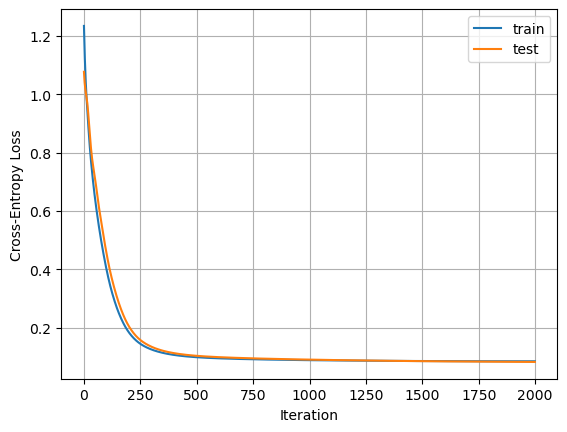

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history["sparse_categorical_crossentropy"],label="train")
plt.plot(history.history["val_sparse_categorical_crossentropy"],label="test")
plt.xlabel("Iteration")
plt.ylabel('Cross-Entropy Loss')
plt.grid()
plt.legend()
plt.show()

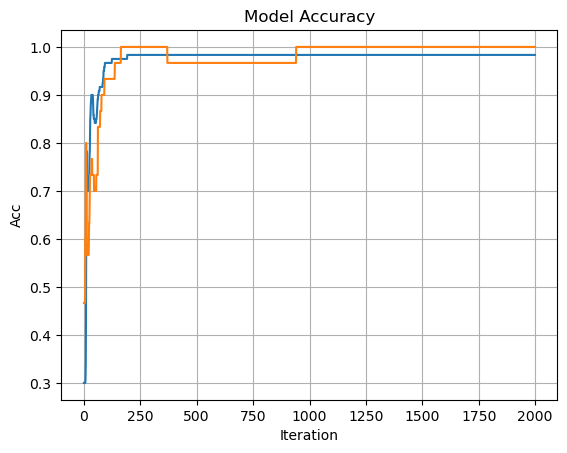

In [14]:
#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.show()

## Save the trained model

In [8]:
keras_model.save("IrisModel")

INFO:tensorflow:Assets written to: IrisModel/assets


INFO:tensorflow:Assets written to: IrisModel/assets


## Check we can re-load our saved model back in
- And check it still works (we will print its accuracy on the test set!)

In [9]:
model2 = keras.models.load_model('IrisModel') # just need to give it a folder name here.
model2.summary()
predictions=model2(inputs_test)
accuracy_metric=keras.metrics.SparseCategoricalAccuracy()
print("Accuracy of saved model on test set",accuracy_metric(labels_test,predictions).numpy())

TypeError: Error when deserializing class 'SparseCategoricalCrossentropy' using config={'reduction': 'auto', 'name': 'sparse_categorical_crossentropy', 'from_logits': False, 'ignore_class': None}.

Exception encountered: __init__() got an unexpected keyword argument 'reduction'

## End of lecture 3
